In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Dados_Indendio.csv', encoding='latin-1')
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


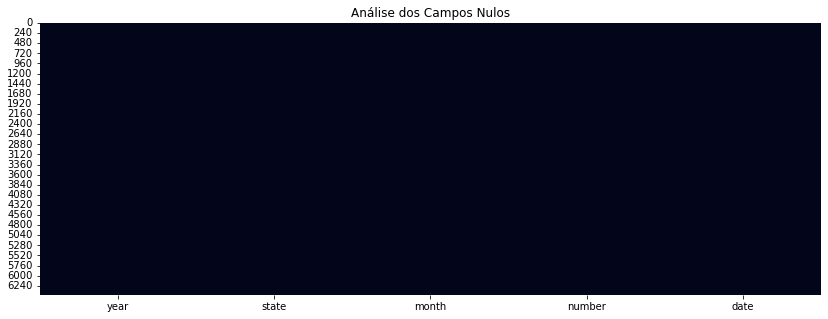

In [6]:
plt.figure(figsize=(14,5))
plt.title("Análise dos Campos Nulos")
sns.heatmap(df.isnull(), cbar=False);

In [7]:
df.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


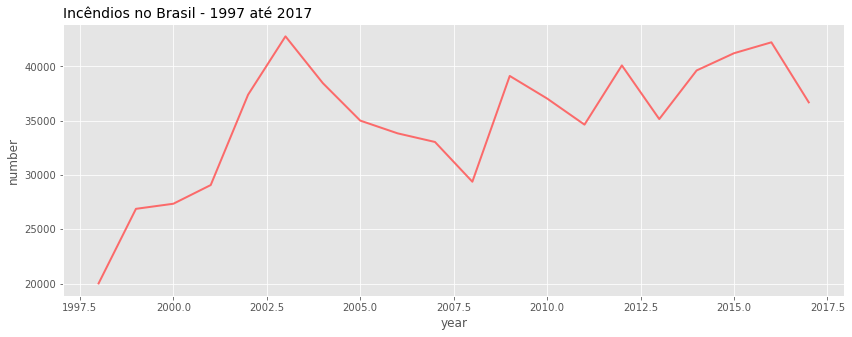

In [13]:
por_ano = df.groupby(by='year').sum().reset_index()
plt.figure(figsize=(14,5))
plt.style.use('ggplot')
plt.title('Incêndios no Brasil - 1997 até 2017', loc="left", fontsize=14)
sns.lineplot(data=por_ano, x='year', y='number', estimator='sum', lw=2, color='#ff5555', alpha=0.85);

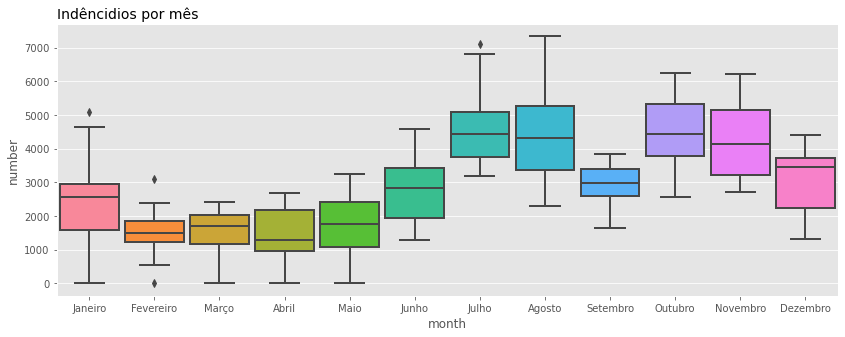

In [26]:
por_mes_ano = df.groupby(by=['month', 'year']).sum().reset_index()
plt.figure(figsize=(14,5))
plt.title( 'Indêncidios por mês', loc='left', fontsize=14 )

sns.boxplot(data=por_mes_ano, 
            x='month', 
            y='number', 
            saturation = 1, 
            width=0.9, 
            linewidth=2, 
            order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 
                   'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']);

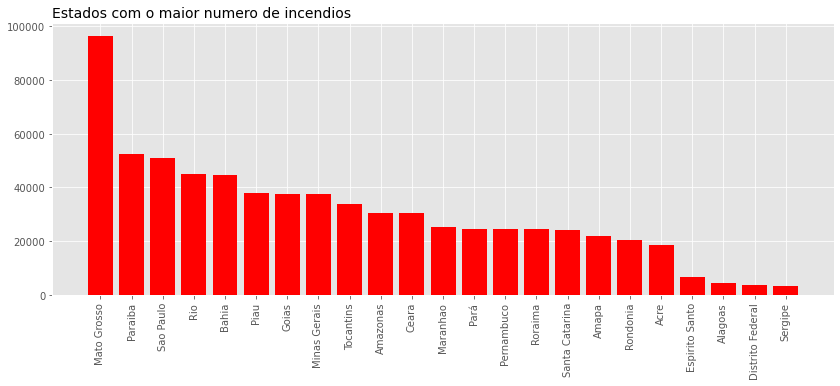

In [33]:
# número de incendios por estado
plt.figure(figsize=(14,5))
plt.title('Estados com o maior numero de incendios', loc='left', fontsize=14)
a3 = df.groupby(by=['state']).sum().reset_index()[['state', 'number']].sort_values('number', ascending=False)
plt.bar(a3.state, a3['number'], color='red')
plt.xticks(rotation=90);